# Иследование данных о поездках пользователей  сервиса аренды самокатов GoFast

Аренда самокатов на данный момент является одной из популярных и развивающихся услуг. В данной сфере необходимо учитывать много факторов, для контроля и управления деятельностью.

**Цель иследования:** Проверить как заданные гипотизы повлияют на рост бизнеса.

**Ход исследования:**

Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.

Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.

Расширение набора данных: добавление новых столбцов, таких как  суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, помесячная выручка по каждому пользователю
Объединение данных из разных датафреймов

Исследовательский анализ данных: изучение и визуализация общей информации о пользователях и поездках, а также выявление и обработка аномалий.

Проверить гипотизы:
    

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

С помощью данного иследования нам необходимо дать рекомендации для принятия решений по увелечению выручки компании.

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)

users = pd.read_csv('/datasets/users_go.csv', sep = ',')
rides = pd.read_csv('/datasets/rides_go.csv', sep = ',')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep = ',')

In [3]:
def data_info(data):
    display(data.sample(7))
    data.info()
    data.hist(figsize=(5, 5)) # как добавить в функцию дубликаты и др

,user_id,name,age,city,subscription_type
393,394,Алиса,31,Ростов-на-Дону,ultra
1179,1180,Регина,26,Омск,free
769,770,Снежана,27,Краснодар,free
412,413,Нелли,19,Ростов-на-Дону,ultra
1310,1311,Яна,24,Пятигорск,free
1326,1327,Алла,22,Пятигорск,free
249,250,Аделина,18,Сочи,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

дубликаты

31

           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000


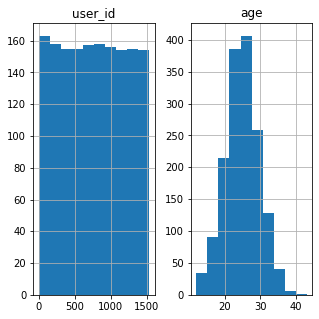

In [4]:
print(data_info(users), users.isna().sum(), 'дубликаты', users.duplicated().sum(), users.describe(), sep='\n\n')

На данном этапе по датафрейму пользователи: дубликаты 31, выбросов нет, пропущенных значений нет.

,user_id,distance,duration,date
2765,295,3156.039440,19.624158,2021-04-08
17591,1502,4524.585800,12.695541,2021-03-11
3766,404,648.322984,10.440718,2021-12-10
17188,1473,3648.330080,18.681238,2021-05-09
10400,985,3639.916376,32.854089,2021-06-09
1992,215,3810.425921,19.886931,2021-05-30
1958,212,3221.767449,18.370944,2021-02-20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

user_id     0
distance    0
duration    0
date        0
dtype: int64

дубликаты

0

            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963


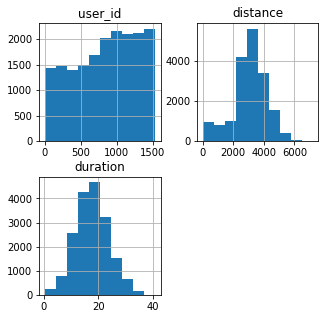

In [5]:
print(data_info(rides),
      rides.isna().sum(),
      'дубликаты', rides.duplicated().sum(),
      rides.describe(),
      sep='\n\n')

На данном этапе по датафрейму пользователи: дубликатов нет, выбросов вроде нет, проверить поездку в 6000 м, пропущенных значений нет.

In [6]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

2.1 Приведите столбец date к типу даты pandas.

In [7]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


2.2 Создайте новый столбец с номером месяца на основе столбца date.

In [9]:
rides['num_month'] = rides['date'].dt.month

2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют. - смотрела ранее, были дубликаты, надо их проверить

In [10]:
i = users[users.duplicated()]
i.sort_values(by = 'user_id')

,user_id,name,age,city,subscription_type
1535,16,Амалия,27,Краснодар,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
1549,108,Влада,29,Тюмень,ultra
1553,121,Алина,25,Пятигорск,ultra
1540,127,Павел,25,Пятигорск,ultra
1548,136,Марсель,25,Тюмень,ultra
1543,153,Герман,23,Москва,ultra
1542,204,Руслан,30,Пятигорск,ultra


In [11]:
users = users.drop_duplicates()

In [12]:
users.duplicated().sum()

0

Создала столбец с датой в нужной формате и вынесла номер месяца. Проверила наличие пропущенных значений и дубликатов в датафреймах

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:

3.1 частота встречаемости городов;

In [13]:
city = users['city'].value_counts().reset_index()
city.columns = ['city', 'count']
city['ratio'] = city['count'] / city['count'].sum() * 100
city

,city,count,ratio
0,Пятигорск,219,14.276402
1,Екатеринбург,204,13.298566
2,Ростов-на-Дону,198,12.907432
3,Краснодар,193,12.581486
4,Сочи,189,12.320730
5,Омск,183,11.929596
6,Тюмень,180,11.734029
7,Москва,168,10.951760


Text(0.5, 1.0, 'Частота встречаемости городов')

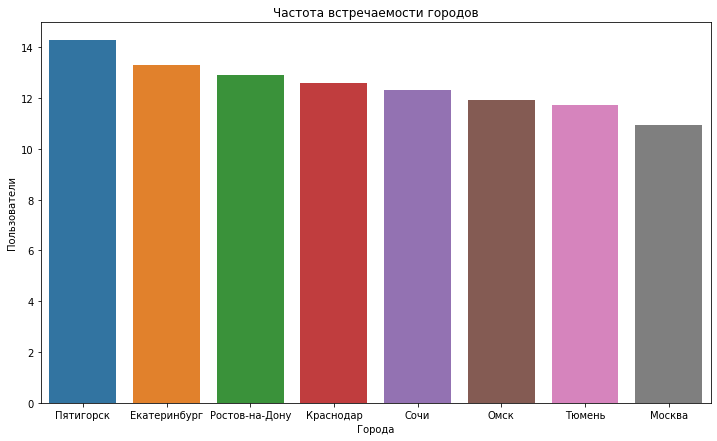

In [14]:
plt.figure(figsize=(12,7))
sns.barplot(x=city['city'], y = city['ratio'], data=city)
plt.xlabel('Города')
plt.ylabel('Пользователи')
plt.title('Частота встречаемости городов')

В данных информация по семи городам, показывает что количество пользователей примерно одинаково. Пятигорск - город с самым большим количеством пользователей, Москва с наименьшим.

3.2 соотношение пользователей с подпиской и без подписки;

In [15]:
subscription = users.groupby('subscription_type')['subscription_type'].agg(['count']).reset_index()
subscription

,subscription_type,count
0,free,835
1,ultra,699


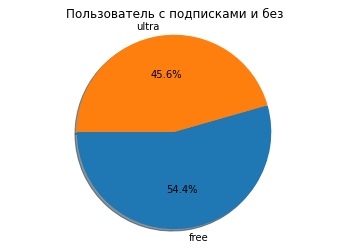

In [16]:
labels = subscription['subscription_type']
values = subscription['count']
plt.title('Пользователь с подписками и без')
plt.pie(values,labels=labels,shadow=True,autopct='%1.1f%%',startangle=180 )
plt.axis('equal')
plt.show()

Пользователей с подпиской на 10% меньше, чем без.

3.3 возраст пользователей;

In [17]:
ages = users.groupby('age')['age'].agg(['count']).reset_index()
ages

,age,count
0,12,4
1,13,8
2,14,9
3,15,13
4,16,19
5,17,26
6,18,46
7,19,47
8,20,71
9,21,93


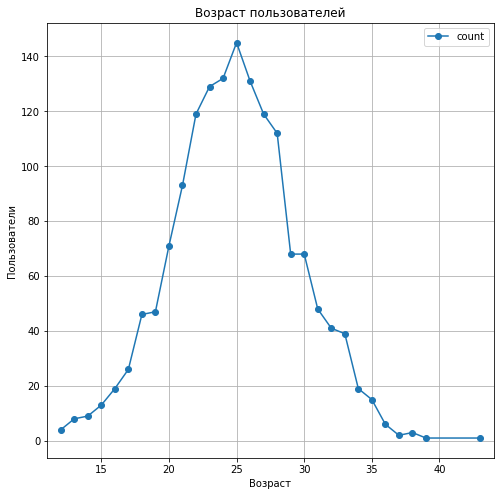

In [18]:
ages.plot(x='age', y='count', style='o-', xlim=(11, 44), grid=True, figsize=(8, 8));
plt.xlabel('Возраст');
plt.ylabel('Пользователи');
plt.title('Возраст пользователей');

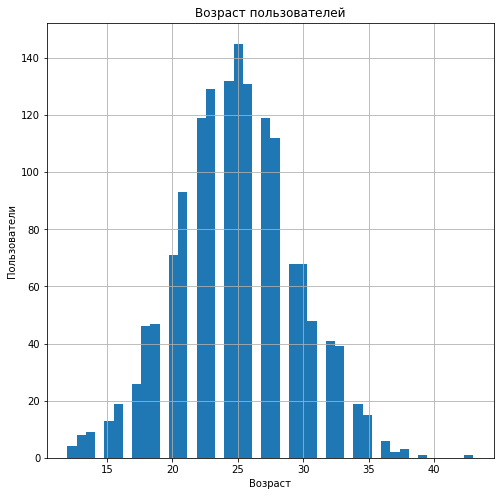

In [19]:
users['age'].hist(bins=44, figsize=(8, 8));
plt.xlabel('Возраст');
plt.ylabel('Пользователи');
plt.title('Возраст пользователей');

Из графика, мы видим что большинство пользователей, от 20 до 30 лет

3.4 расстояние, которое пользователь преодолел за одну поездку;

In [20]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

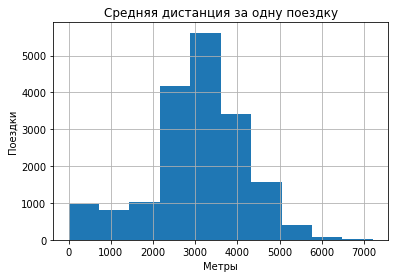

In [21]:
rides['distance'].hist();
plt.xlabel('Метры');
plt.ylabel('Поездки');
plt.title('Средняя дистанция за одну поездку');

Средняя дистанция 3 км, большая часть пользователей проезжает от 2,5 до 3,5 км

3.5 продолжительность поездок

In [22]:
rides.head(10)

,user_id,distance,duration,date,num_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [23]:
rides.query("user_id == 1")

,user_id,distance,duration,date,num_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [24]:
durations = rides.groupby('user_id').agg({'duration':['mean','min','max']})
durations

duration                      
              mean        min        max
user_id                                 
1        17.050409   6.232113  26.265803
2        17.967662   6.914760  26.027432
3        19.432793  12.654443  25.848038
4        20.611684  11.811399  35.896929
5        15.824903  11.087710  21.680107
...            ...        ...        ...
1530     17.198049   5.267070  31.466011
1531     17.747487   5.406654  30.428027
1532     16.320011   7.792490  32.013212
1533     18.506177   6.299996  27.989727
1534     17.679625   6.469074  26.916544

[1534 rows x 3 columns]

In [25]:
durations.describe()

duration                          
              mean          min          max
count  1534.000000  1534.000000  1534.000000
mean     17.926440     8.859821    27.786594
std       1.971150     3.849273     3.877322
min      11.163431     0.500000    15.277024
25%      16.613880     6.348307    25.051467
50%      17.903937     9.292523    27.801024
75%      19.198581    11.557701    30.659016
max      26.136000    21.694555    40.823963

In [26]:
rides.describe()

,user_id,distance,duration,num_month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


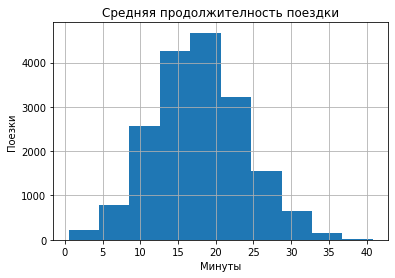

In [27]:
rides['duration'].hist();
plt.xlabel('Минуты');
plt.ylabel('Поезки');
plt.title('Средняя продолжителность поездки');

Среднее продолжительность поздки 17 минут. У большей части пользователей поездка занимает от 13 до 21 минуты

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [28]:
rides.shape

(18068, 5)

In [29]:
rides_users = rides.merge(users, on='user_id', how='outer')
rides_users

,user_id,distance,duration,date,num_month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


In [30]:
rides_users.isna().sum()

user_id              0
distance             0
duration             0
date                 0
num_month            0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [31]:
rides_users.shape

(18068, 9)

4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

c данными о пользователях без подписки;

In [32]:
free_users = rides_users.query("subscription_type == 'free'")
free_users

,user_id,distance,duration,date,num_month,name,age,city,subscription_type
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


с данными о пользователях с подпиской.

In [33]:
ultra_users = rides_users.query("subscription_type == 'ultra'")
ultra_users

,user_id,distance,duration,date,num_month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra


4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [34]:
free_users['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [35]:
free_users['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [36]:
ultra_users['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [37]:
ultra_users['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Text(0, 0.5, 'duration(min)')

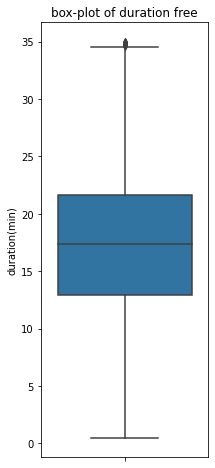

In [38]:
plt.figure(figsize=(3,8))
sns.boxplot(y="duration", data=free_users, orient='v');
plt.title('box-plot of duration free');
plt.ylabel('duration(min)')

Text(0, 0.5, 'duration(min)')

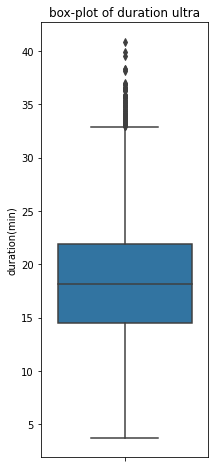

In [39]:
plt.figure(figsize=(3,8))
sns.boxplot(y="duration", data=ultra_users,  orient='v');
plt.title('box-plot of duration ultra');
plt.ylabel('duration(min)')

Средняя продолжительность поездки для пользователей с подпиской и без около 18 минут.Минимальная позкдка для пользователей без подписки 0 минут, максимальная 34.  Минимальная позкдка для пользователей с подпиской 3 минуты, максимальная 40. Мы видим что пользователи с подпиской используют самокат дольше.

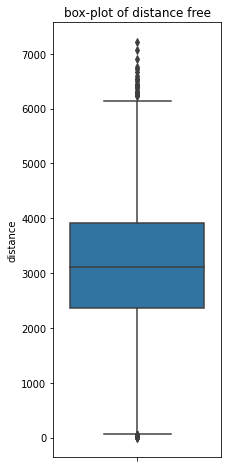

In [40]:
plt.figure(figsize=(3,8))
sns.boxplot(y="distance", data=free_users, orient='v');
plt.title('box-plot of distance free');


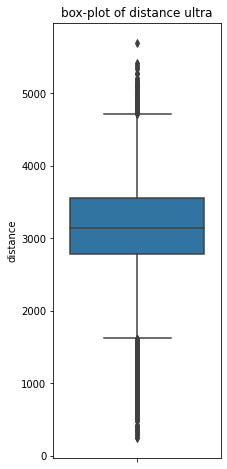

In [41]:
plt.figure(figsize=(3,8))
sns.boxplot(y="distance", data=ultra_users,  orient='v');
plt.title('box-plot of distance ultra');

У пользователей без подписки максимальная дальность поездки больше, чем у пользователей с подпиской. А средний показатель примерно равен 3000 метрам.

#### Шаг 5. Подсчёт выручки

In [42]:
data_users = users
data_rides = rides
data_subscription = subscriptions
data_rides["date"] = pd.to_datetime(data_rides["date"] , format = "%Y-%m-%d")
data_rides["month"] = data_rides["date"].apply(lambda x: x.month)
data_users = data_users.drop_duplicates()
data_users = data_users.reset_index(drop = True)
data_all = data_rides.merge(data_users)
data_all = data_all.merge(data_subscription)

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [43]:
data_pivo = data_all.drop(['date'] , axis = 1).groupby(["month" , "user_id"]).agg(["count" , "sum"])[["distance" , "duration"]]["distance"].reset_index()
data_pivo.rename(columns = {'sum':'distance_sum'}, inplace = True )
tmp = data_all.drop(['date'] , axis = 1).groupby(["month" , "user_id"]).agg(["count" , "sum"])[["distance" , "duration"]]["duration"].reset_index()
data_pivo = data_pivo.merge(tmp)
data_pivo.rename(columns = {'sum':'duration_sum'}, inplace = True )
data_pivo["distance_sum"] = data_pivo["distance_sum"].apply(lambda x: round(x , 1))
data_pivo["duration_sum"] = data_pivo["duration_sum"].apply(lambda x: np.ceil(x))
data_pivo.head(20)

,month,user_id,count,distance_sum,duration_sum
0,1,1,2,7027.5,42.0
1,1,3,1,3061.8,13.0
2,1,5,1,3914.6,13.0
3,1,7,2,6478.1,28.0
4,1,12,1,3577.2,33.0
5,1,13,2,6688.0,42.0
6,1,14,2,7699.6,34.0
7,1,15,1,4187.6,39.0
8,1,20,1,3516.7,29.0
9,1,22,1,3058.7,13.0


5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки

In [44]:
data_pivo = data_pivo.merge(data_users)
data_pivot = data_pivo[["month" , "user_id" ,"count" , "distance_sum" , "duration_sum" , "subscription_type"]]
data_pivot

,month,user_id,count,distance_sum,duration_sum,subscription_type
0,1,1,2,7027.5,42.0,ultra
1,4,1,1,754.2,7.0,ultra
2,8,1,2,6723.5,45.0,ultra
3,10,1,2,5809.9,32.0,ultra
4,11,1,3,7003.5,54.0,ultra
...,...,...,...,...,...,...
11326,11,1348,2,6622.8,38.0,free
11327,12,1348,2,6308.8,40.0,free
11328,9,636,1,1159.9,13.0,ultra
11329,10,636,3,8885.2,71.0,ultra


In [45]:
data_pivot.isna().sum()

month                0
user_id              0
count                0
distance_sum         0
duration_sum         0
subscription_type    0
dtype: int64

In [46]:
def salary(items):
    res = 0
    if items["subscription_type"] == "free":
        res += 50 * items["count"]
        res += 8 * items["duration_sum"]
        return res
    if items["subscription_type"] == "ultra":
        res += 199
        res += 6 * items["duration_sum"]
        return res 

    


data_pivot = data_pivot.copy()  
data_pivot.loc[:, "money"] = data_pivot.apply(salary, axis=1)

data_pivot

,month,user_id,count,distance_sum,duration_sum,subscription_type,money
0,1,1,2,7027.5,42.0,ultra,451.0
1,4,1,1,754.2,7.0,ultra,241.0
2,8,1,2,6723.5,45.0,ultra,469.0
3,10,1,2,5809.9,32.0,ultra,391.0
4,11,1,3,7003.5,54.0,ultra,523.0
...,...,...,...,...,...,...,...
11326,11,1348,2,6622.8,38.0,free,404.0
11327,12,1348,2,6308.8,40.0,free,420.0
11328,9,636,1,1159.9,13.0,ultra,277.0
11329,10,636,3,8885.2,71.0,ultra,625.0


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Обозначим настоящую среднюю времени на поездки пользователей с подпиской как μ1, пользователей без подписки как μ2 тогда<br>
Но: μ1 = μ2
<br>
H1: μ1 > μ2
<br>
alpha = 0.05

In [47]:
test_ultra = ultra_users['duration']
test_free = free_users['duration']


alpha = 0.05

results = st.ttest_ind(test_ultra, test_free, alternative = 'greater')

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print("Принимаем альтернативную гипотезу")
else:
    print("Опровергнуть нулевую гипотезу нельзя")

p-value 1.2804098316645618e-34
Принимаем альтернативную гипотезу


**Выгоднее**

6.2 Расстояние одной поездки в 
3130
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130
3130 метров? Проверьте гипотезу и сделайте выводы.

Обозначим настоящую среднее расстояние за 1 поездку пользователей с подпиской как μ,  тогда<br>
Но: μ1 = 3130
<br>
H1: μ1 > 3130
<br>
alpha = 0.05

In [48]:
distance_hypothesis = 3130

results = st.ttest_1samp(rides_users[rides_users['subscription_type'] == 'ultra']['distance'], distance_hypothesis, alternative='greater')

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print("Принимаем альтернативную гипотезу")
else:
    print("Опровергнуть нулевую гипотезу нельзя")

p-value 0.9195368847849785
Опровергнуть нулевую гипотезу нельзя


6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Обозначим настоящую среднюю выручку за месяц от пользователей с подпиской как μ1, пользователей без подписки как μ2 тогда<br>
Но: μ1 = μ2 
<br>
H1: μ1 > μ2
<br>
alpha = 0.05

In [49]:
ultra = data_pivot.query('subscription_type == "ultra"')['money']
free = data_pivot.query('subscription_type == "free"')['money']

alpha = 0.05

results = st.ttest_ind(ultra, free, alternative= 'greater')

print('p-value', results.pvalue)

if (results.pvalue < alpha ):
    print("Принимаем альтернативную гипотезу")
else:
    print("Опровергнуть нулевую гипотезу нельзя")

p-value 2.8130926188487286e-35
Принимаем альтернативную гипотезу


6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотизы используем Т-тест

Н0 - Средне количесство обращений осталось прежним

н1 - Среднее количество обращени снизилось

#### Шаг 7. Вывод

   Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.
<br>
<br>
    Далее проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца "date" из датафрейма data_riders к типу date. Также добавили столбец month с номером месяца. И удалили полные дубликаты строк из датафрейма с пользователями.
<br>
<br>
Провели исследовательский анализ данных:
<br>
    Выявили, что количество пользователей по городам примерно одинаково, нет анамальных значений. Больше всего пользователей в Пятигорске - 219. Меньше всего пользователей в Москве - 168.
Пользователей, использующих бесплатную подписку больше - 835 человек, это примерно 54% от общего числа пользователей. На платной подписке 699 пользователей, это примерно 46%.
Больше всего пользователей в возрасте от 20 до 30 лет
В основном пользователи проезжают от 2500 до 3800 метров.
Чаще всего длительность поездки состовляет 12 - 22 минуты.
<br>
<br>
    Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:
<br>
Для пользователей с ultra подпиской
<br>
Для пользователей с free подпиской
<br>
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.
<br>

   Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм data_pivot. Добавили в датафрейм data_pivot столбец с помесячной выручкой "money".
<br>
<br>
Проверили гипотезы:
<br>
Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Принимаем альтернативную гипотезу
<br>
Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, около 3130
Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций
<br>
Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Принимаем альтернативную гипотезу